이 노트는 Python 3.7로 작성됐습니다. (Authored by 양재형)

# What does *Pythonic* mean?.?

Python 입문하신 분들은 누구나 해봤을 질문

왜 collection.len()이 아니고 len(collection)이지?.?

*Pythonic* 한거는 뭐지?.?

# 1. Special methods

In [1]:
arr = [1, 2, 3]
len(arr)

3

다들 위 코드가 돌아간다는 것은 알지만, 왜 어떻게 돌아가는거지?.?


**len**은 Python에서 취급하는 특수 함수

구체적인 예시:

In [2]:
import collections
Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                       for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]
    
deck = FrenchDeck()
print(len(deck))

52


**len** 함수가 실행하는 것은 Python 내부의 \_\_len\_\_함수

혹시 직접 만든 함수들도 비슷한 방식으로 호출할 수 있을까?.?

In [3]:
import traceback

class TheoryTest:
    def __init__(self):
        self.items = [1, 2, 3, 4]
        
    def __len__(self):
        return len(self.items)
    
    def __testtheory__(self):
        print("Tested?.?")
    
test = TheoryTest()
print(len(test))
try:
    testtheory(test)# 과연 될까?.?
except Exception as e:
    tb = traceback.format_exc()# 오류 나지만 돌아가게 하기 위한 부분
    print("\n" + tb)

4

Traceback (most recent call last):
  File "<ipython-input-3-7aaf425ee2e8>", line 16, in <module>
    testtheory(test)# 과연 될까?.?
NameError: name 'testtheory' is not defined



역시는 역시 안된다..

하지만..?

In [4]:
def testtheory(test):
    test.__testtheory__()

# 된다는 것을 보여주기 위한 예시일 뿐
# 하지는 말자...
testtheory(test)

Tested?.?


### 특수 함수 (Special Method)는 어떻게 사용되는가?.?

Python interpreter에서 예약된 함수들을 활용해서, object model 내부적으로 구현된 함수를 실행하는것.

기본 데이터형들에 대해서는 Python에서 조금 더 최적화된 방법으로 값을 뽑아내는 경우가 있기도 하고, 직접 호출하는것은 지양 하는것이 일반적이다.

**결론**: 편하게 만들어준 것은 편하게 쓰자

<br />

Python 지지자들이 내세우는 주장 중 하나

**Python의 가장 큰 장점중 하나는 일관성이다.**

In [5]:
arr = [1, 2, 3, 4, 5]
print(arr.__len__()) # 하지말고
print(len(arr)) # 굿

5
5


특수 함수들은 한정되어 있고, 편의를 위해서 만들어졌다는 것이 일반적인 시선이다. 그 동안 Python에서 *어떻게 구현된거지?.?* 했던 마법 같은 기능들은 배후에 특수 함수가 있을 가능성이 높다.

일부 마법을 파헤치기 위해, 몇가지 예시를 짚고 넘어가 보자

#### 1. repr 함수, str 함수

```pythoh
>>> a = Vector(3, 5)
>>> print(a)
Vector(3, 5)
```

이런식으로 프린트를 했을때 객체 형태로 보기에 이쁘게 나오는 것을 어딘가에서 본적 있을거다.

In [6]:
class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __repr__(self): # representation의 약자인것 같다
        return 'Vector(%r, %r)' % (self.x, self.y)
    
    def __str__(self): # java의 toString과 비슷
        return f"(x={self.x} y={self.y})"
x = Vector(3, 5)
print(repr(x))
print(x)

Vector(3, 5)
(x=3 y=5)


**repr** 특수 함수를 통해서 구현돼 있었던 거였다!.!

repr 함수는 일번적으로 공식적인 객체를 나타내는 수단으로 사용된다 (보통 그 객체를 생성하기 위해 사용된 생성자문)

디버깅 용도로 주로 사용

**str** 함수는 실제 유저에게 보여줄 목적으로 생성하는 문자열 형태를 만들기 위해 구현


#### 2. getitem 함수

리스트형 객체에서 사용

In [7]:
import collections
import random
Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                       for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]
    
    def shuffle(self):
        random.shuffle(self._cards)
        
    def __repr__(self): # representation의 약자인것 같다
        return f'FrenchDeck({", ".join(map(str, self._cards))})'
        
deck = FrenchDeck()
deck.shuffle()
deck[0]

for card in deck[:10]:
    print(card)

Card(rank='6', suit='diamonds')
Card(rank='K', suit='spades')
Card(rank='8', suit='diamonds')
Card(rank='7', suit='clubs')
Card(rank='A', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='J', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='J', suit='spades')
Card(rank='A', suit='spades')


#### 3. 그 외 arithmetic 함수들 .__add__, __mul__ 등등이 있다.

근데 그래서 왜 len()은 method가 아니지?.?
> *practicality beats purity* - a quote from The Zen of Python


특수한 기능들은 특별 대우를 받는것 같다.

### tip. 특정 객체가 어떤 attribute들을 갖고 있는지 보고싶으면 **dir** 함수를 호출해보자

In [8]:
print(dir(FrenchDeck))
print(dir(list))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ranks', 'shuffle', 'suits']
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


# 2. ListComps & Generators & DictComps

#### 1. List Comprehension

syntactic sugar 성능상으로는 filter나 map 함수랑 비슷한거로 알고 있음. (책에서는 더 빠르다고 언급됨)

테스트의 여지가 있음...

사용되는 용도에 따라서 코드가 떄로는 더 간결해 질 수도 있다...

In [9]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]

print(tshirts)

for color in colors:
    for size in sizes:
        print((color, size))

[('black', 'S'), ('black', 'M'), ('black', 'L'), ('white', 'S'), ('white', 'M'), ('white', 'L')]
('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


#### 2. Generators

python generator는 객체를 하나하나씩 반환해서, 메모리를 아낄 수 있다

generator expression과 list comprehension의 차이는 [] 와 () 의 차이

generator는 ()

In [10]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


lazy generation of values를 통해

메모리를 아끼고 필요한 시점에 데이터를 생성해낸다.

https://wiki.python.org/moin/Generators

In [11]:
# Using the generator pattern (an iterable)
class firstn(object):
    def __init__(self, n):
        self.n = n
        self.num = 0

    def __iter__(self):
        return self

    # Python 3 compatibility
    def __next__(self):
        return self.next()

    def next(self):
        if self.num < self.n:
            cur, self.num = self.num, self.num+1
            return cur
        else:
            raise StopIteration()

sum_of_first_n = sum(firstn(1000000))
print(sum_of_first_n)

499999500000


In [12]:
from pympler.asizeof import asizeof
print(asizeof(firstn(1000000)))
print(asizeof(list(range(1000000))))
print(asizeof((i for i in range(1000000))))
print(asizeof(list(i for i in range(1000000))))

ModuleNotFoundError: No module named 'pympler'

**보이시나요 차이가?.?**

### extra notes) **range vs. xrange vs. irange**

https://stackoverflow.com/questions/22971078/how-is-irange-any-different-from-range-or-xrange

irange는 generator expression

#### 3. dict comprehension

Dictionary를 쉽게 만들때 사용

In [ ]:
squared_dict = {
    i : i * i for i in range(1, 11)
}
squared_dict

extra) set 만들기

In [ ]:
arr = [1, 1, 3, 4, 4, 6, 7, 8]
repeated_set = {
   x for x in arr
}
print(type(repeated_set))
repeated_set

In [ ]:
# 집합 연산 예제 ~_~

a = {1, 2, 3}
b = {3, 4, 5}

print(a & b)
print(a | b)
print(a - b)

# 3. Python의 Immutable type들

 **int, float, decimal, bool, string, tuple, and range**
 
 mutable한 타입은
 
 **list, dictionary, set and user-defined classes**

In [ ]:
hash(range(3, 5))
hash(3)
hash('asdf')

왜 immutable 설명하다가 갑자기 hash?.?

왜냐하면 이 둘은 굉장히 밀접한 관계를 갖고 있기 때문...

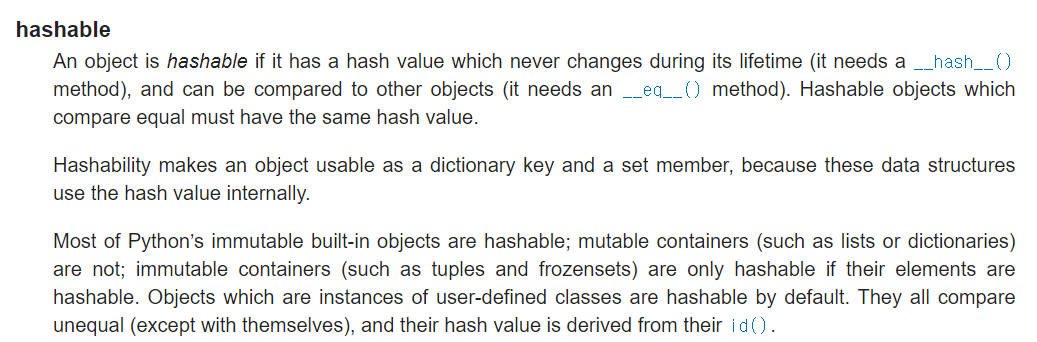

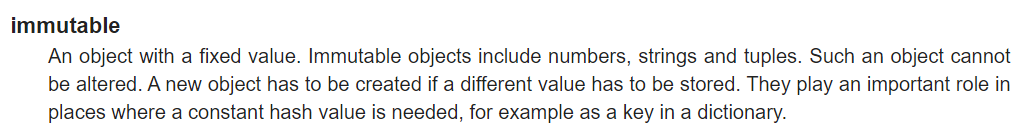

https://docs.python.org/3/glossary.html 발췌

보통의 경우 immutable 하다는 것은 hashable과 동일한 의미로 해석될 수 있다. (반대는 거짓)

hashable하면 dictionary 키값으로 사용가능

기본적으로 User-Defined Object는 hashable하다. id(사용)

__hash__ 함수와 __eq__ 함수를 정의해서 User-Defined Object를 hashable 하게 직접 구현할 수 있다.

In [ ]:
a = (1, 2, 3)
hash(a)
b = [1, 2, 3]
c = (1, 2, 3)
hash(c)

In [ ]:
test_dict = {deck: 3}
# 아까 위에서 정의한 객체가 dictionary key로 사용됨
print(deck)

extra) **id** 함수가 나온 김에 추가적인 설명

일반적으로 Python == operator는 객체 내부의 값을 비교한다.

내부적으로는 **\_\_eq\_\_** 함수를 통해서 구현

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
print(a == b)

a = (1, 2, 3)
b = (1, 2, 3)
print(a == b)

In [ ]:
import collections
import random
Card = collections.namedtuple('Card', ['rank', 'suit'])

class EqualFrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                       for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]
    
    def shuffle(self):
        random.shuffle(self._cards)
        
    def __repr__(self): # representation의 약자인것 같다
        return f'FrenchDeck({", ".join(map(str, self._cards))})'
    
    def __hash__(self):
        return id(self)
    
    def __eq__(self, other):
        return tuple(self._cards) == tuple(other._cards)

deckA = EqualFrenchDeck()
deckB = EqualFrenchDeck()
print(deckA == deckB)
deckA.shuffle()

print(deckA == deckB)

객체 주소값을 비교하고 싶으면 **is** expression 사용

In [ ]:
deckA = EqualFrenchDeck()
deckB = EqualFrenchDeck()
print(deckA == deckB)
print(deckA is deckB)

#### 넘어가기 전에 dictionary 사용할때 주의할 점

dictionary는 memory를 시간과 바꾼 use case

변할 필요가 없는 객체를 나타내고 싶을 때는 tuple이나 named tuple를 사용하는게 나을수도 있다

In [ ]:
import collections

Person = collections.namedtuple('Person', 'name gender')

sunku = Person('sunku', 'male')
jaeho = Person('jaeho', 'male')

print(asizeof(sunku))
print(asizeof({'name': 'sunku', 'gender': 'male'}))
print(sunku.name)

In [ ]:
class UDPerson:
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender

person = UDPerson('sunku', 'male')
print(asizeof(person))

핵심은 namedtuple 을 사용하는게 dictionary를 사용하는 것보다 메모리를 적게 사용한다. 그 이유는 다음 이야기에...

일반적으로는 dictionary가 커질수록 둘의 차이는 커진다. 

# 4. Python에서 Function

Python에서 function 은 first-class objects라고 부른다.

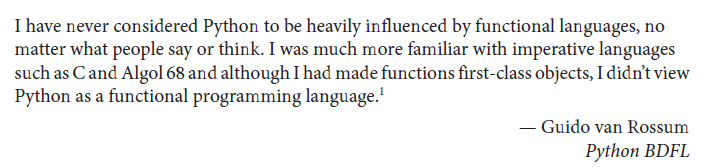

#### first-class object 의 정의란:

 - runtime에 생성되거나
 - 변수에게 할당될 수 있거나
 - 함수의 인자로 넘길 수 있거나
 - 함수의 반환값으로
 
 
 사용될 수 있는 entity
 
 Python 에서 함수는 객체라고 생각하는게 맞다.

In [ ]:
def factorial(n):
    return 1 if n < 2 else n * factorial(n - 1)

print(factorial)
print(type(factorial))
print(dir(factorial))

fact = factorial
print(fact(5))

####  Function도 결국은 Callable한 object

callable의 7가지 종류

1. User Defined functions
2. Built-in functions
3. Built-in methods
4. Methods
5. Classes
6. Class Instances
7. Generator functions

아리까리 하면 callable을 호출해보면 된다

In [ ]:
print(callable(factorial))
print(callable(3))

위 목록에서 나머지는 그렇다 치는데,

Class instances는 어떻게 callable한거지?.?

=> \_\_call\_\_함수를 구현하면 된다

In [ ]:
class Phone:
    def __init__(self, number):
        self.number = number
    
    def __call__(self):
        print(self.number)
        
galaxy = Phone('010-1234-5678')
galaxy()
print(callable(galaxy))

# 5. Python에서 Access Modifying?.?

가능할까?.?

In [ ]:
class Lock:
    def __init__(self, password):
        self._password = password
        
    def access(self, password):
        if self._password == password:
            print("Access Granted")
        else:
            print("Access Denied")

lock = Lock('mypassword')
lock.access('yourpassword')

lock._password = 'yourpassword'
lock.access('yourpassword')

그런거는 없어 보인다...

하지만 과연 그럴까?.?

In [ ]:
class SafeLock:
    def __init__(self, password):
        self.__password = password
        
    def access(self, password):
        if self.__password == password:
            print("Access Granted")
        else:
            print("Access Denied")

safelock = SafeLock('mypassword')
safelock.access('yourpassword')

safelock.__password = 'yourpassword'
safelock.access('yourpassword')

***위와 동일해 보이는데 어째서인지 된다...***


비밀은 \_ 가 아닌 \_\_를 사용해서 그렇다.

왜그런지 궁금하면 introspection를 활용해보자!.!

In [ ]:
print(dir(lock))
print()
print(dir(safelock))

#### \_\_ 를 붙이는거는 안전장치에 불과하다

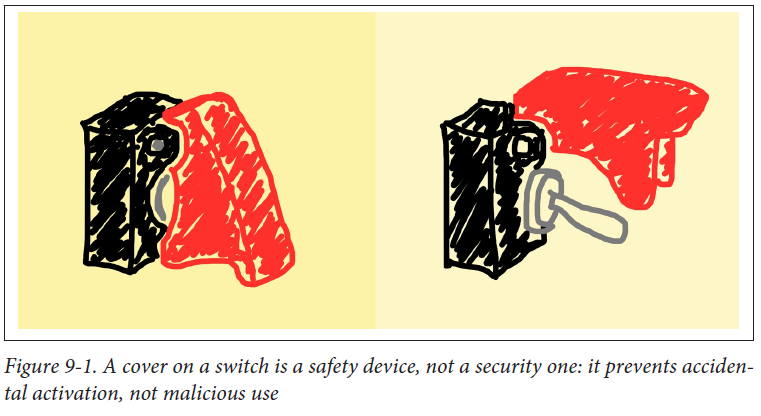

In [ ]:
safelock._SafeLock__password = 'yourpassword'
safelock.access('yourpassword')

#### 그래도 뭔가 더 그럴싸한 방법이 있지 않을까?.?

In [ ]:
class SaferLock:
    def __init__(self, password):
        self.passcode = password
        
    def access(self, password):
        if self.passcode == password:
            print("Access Granted")
        else:
            print("Access Denied")
    
    @property    
    def password(self):
        return self.passcode
    
    @password.setter
    def password(self, password):
        print("You may not change the password!")
        
safer_lock = SaferLock('mypassword')
print(safer_lock.password)
safer_lock.password = 'yourpassword'

#### 조금 더 그럴싸해졌다!.!

조금 다른 방법 소개

In [ ]:
def Lock(password):
    def check(input_password):
        if password == input_password:
            print('Access Granted')
        else:
            print('Access Denied')
    return check

validate = Lock('mypassword')
validate('yourpassword')
validate('mypassword')
print(dir(validate))

완벽히 밖에서 차단된 password variable 구현

다만, 함수에 극한...

### practicality beats purity - Python을 설명하는 가장 직관적인 한마디